In [2]:
import pandas as pd

In [3]:
Raw_Housing_Data=pd.read_csv("Transformed_Housing_Data2[2].csv")

In [4]:
Raw_Housing_Data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
Raw_Housing_Data['mean_sales']=Raw_Housing_Data['Sale_Price'].mean()
Raw_Housing_Data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

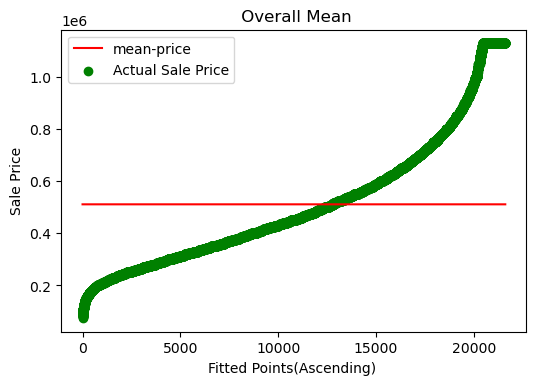

In [7]:
import matplotlib.pyplot as plt
k=range(0,len(Raw_Housing_Data))
plt.figure(dpi=100)
plt.scatter(k,Raw_Housing_Data['Sale_Price'].sort_values(),color='green',label='Actual Sale Price')
plt.plot(k,Raw_Housing_Data['mean_sales'].sort_values(),color='red',label='mean-price')
plt.xlabel("Fitted Points(Ascending) ")
plt.ylabel("Sale Price")
plt.title(" Overall Mean")
plt.legend()

In [8]:
import numpy as np
grades_mean=Raw_Housing_Data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [9]:
#making a new column
Raw_Housing_Data['grade_mean']=0
#for every grade its mean price in new column
for i in grades_mean.columns:
 Raw_Housing_Data['grade_mean'][Raw_Housing_Data['Overall Grade']==i]=grades_mean[i][0]
    
Raw_Housing_Data['grade_mean'].head()
    

<ipython-input-9-7e7800c42a08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data['grade_mean'][Raw_Housing_Data['Overall Grade']==i]=grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [10]:
gradewise_list=[]
for i in range(1,11):
    k=Raw_Housing_Data['Sale_Price'][Raw_Housing_Data['Overall Grade']==i]
    gradewise_list.append(k)

In [11]:
classwise_list=[]
for i in range(1,11):
    k=Raw_Housing_Data['Sale_Price'][Raw_Housing_Data['Overall Grade']==i]
    classwise_list.append(k)

ValueError: x and y must be the same size

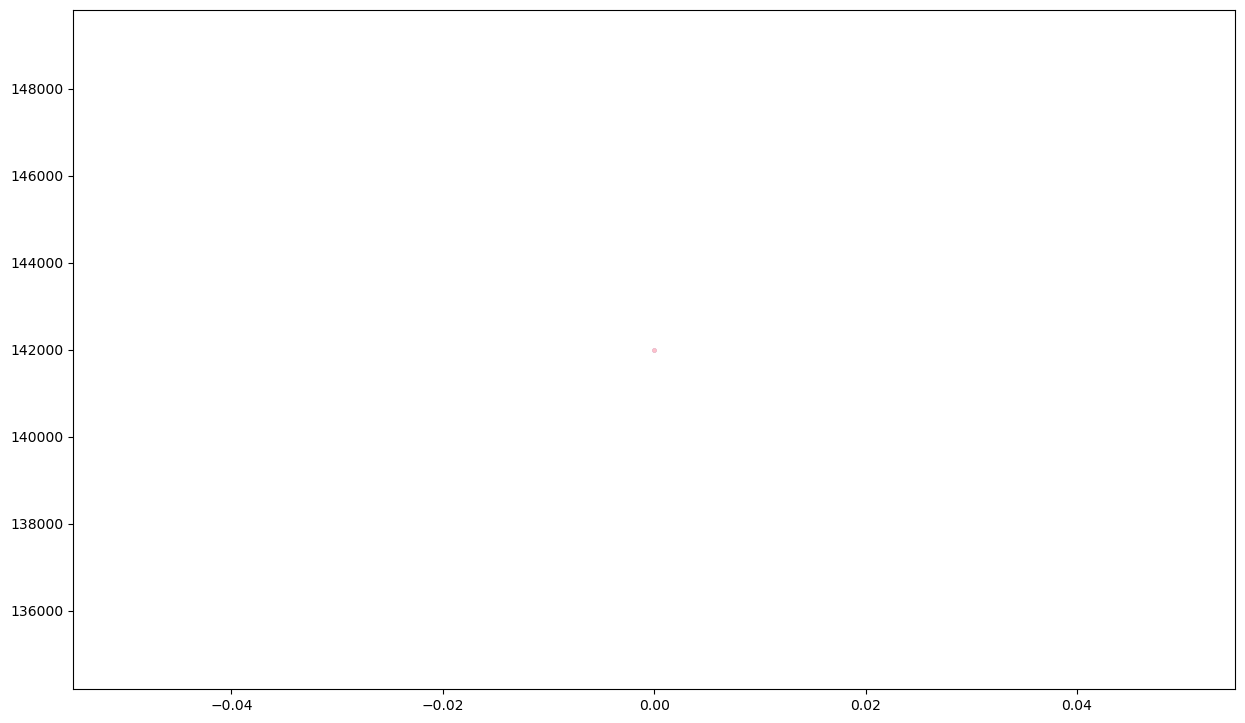

In [12]:
plt.figure(dpi=100,figsize=(15,9))
z=0
for i in range(1,11):
    points=[k for k in range(z,z+len(classwise_list[i-1]))]
    plt.scatter(points,classwise_list[i-1].sort_values(),label=('House with overall grade',i),s=4)
    plt.scatter(points,[classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
                        s=6,color='pink')
    z=max(points)+1
    plt.scatter([q for q in range(0,z)],Raw_Housing_Data['mean_sales'],color="red",label="overall mean",s=6)
                                   
plt.xlabel(" Filtered Price")
plt.ylabel("Sale_Price")
plt.title("Overall_Mean1")
plt.legend(loc=4)
         
        



In [13]:
mean_difference=Raw_Housing_Data['mean_sales']-Raw_Housing_Data['Sale_Price']
grade_mean_difference=Raw_Housing_Data['grade_mean']-Raw_Housing_Data['Sale_Price']

<ipython-input-14-12eaefc5eaf6>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


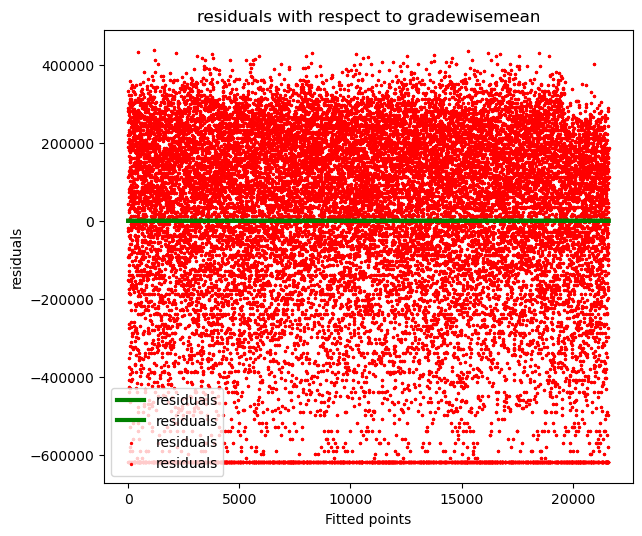

In [14]:
k=range(0,len(Raw_Housing_Data))
l=[0 for i in range(len(Raw_Housing_Data))]
plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='residuals',s=2)
plt.plot(k,l,color='green',label='residuals',linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel("residuals")
plt.title("residuals with respect to gradewisemean")
plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='residuals',s=2)
plt.plot(k,l,color='green',label='residuals',linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel("residuals")
plt.legend()
plt.title("residuals with respect to gradewisemean")
plt.legend()

In [17]:
cost=sum(mean_difference)/len(Raw_Housing_Data)
print(round(cost,7))

0.0


In [16]:
Y=Raw_Housing_Data['Sale_Price']
y_hat1=Raw_Housing_Data['mean_sales']
y_hat2=Raw_Housing_Data['grade_mean']
n=len(Raw_Housing_Data)
len(Y),len(y_hat1),len(y_hat2),n

(21609, 21609, 21609, 21609)

In [18]:
cost_mean=sum(abs(y_hat1-Y))/n
cost_mean

199168.78146839526

In [19]:
cost_grade_mean=sum(abs(y_hat2-Y))/n
cost_grade_mean

137081.70298203363

In [20]:
import sklearn
from sklearn.metrics import mean_absolute_error
cost_grade_mean=mean_absolute_error(y_hat2,Y)
cost_grade_mean

137081.7029820291

In [21]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(y_hat2,Y)
cost_grade_mean=mean_squared_error(y_hat2,Y)
cost_mean,cost_grade_mean

(30804835720.342426, 30804835720.342426)

In [22]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(y_hat1,Y)**0.5
cost_grade_mean=mean_squared_error(y_hat2,Y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [23]:
Y=Raw_Housing_Data[['Sale_Price']
y_hat1=Raw_Housing_Data['mean_sales']
y_hat2=Raw_Housing_Data['grade_mean']
n=len(Raw_Housing_Data)
len(Y),len(y_hat1),len(y_hat2),n
                   
                   

SyntaxError: invalid syntax (<ipython-input-23-712c0a1f0cac>, line 2)

In [24]:
mse_mean=mean_squared_error(y_hat1,Y)
mse_mean

62528116847.799576

In [25]:
mse_model=mean_squared_error(y_hat1,Y)
mse_model

62528116847.799576

In [26]:
R2=1-(mse_model)/(mse_mean)
R2

0.0

In [38]:
Raw_Housing_Data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,1,0,0,0,0,0,0,511618.558147,537584.082097
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,0,0,0,0,0,0,0,511618.558147,537584.082097
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097


In [105]:
sale_price=Raw_Housing_Data['Sale_Price'].head(30)
flat_area=Raw_Housing_Data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data


,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


No handles with labels found to put in legend.


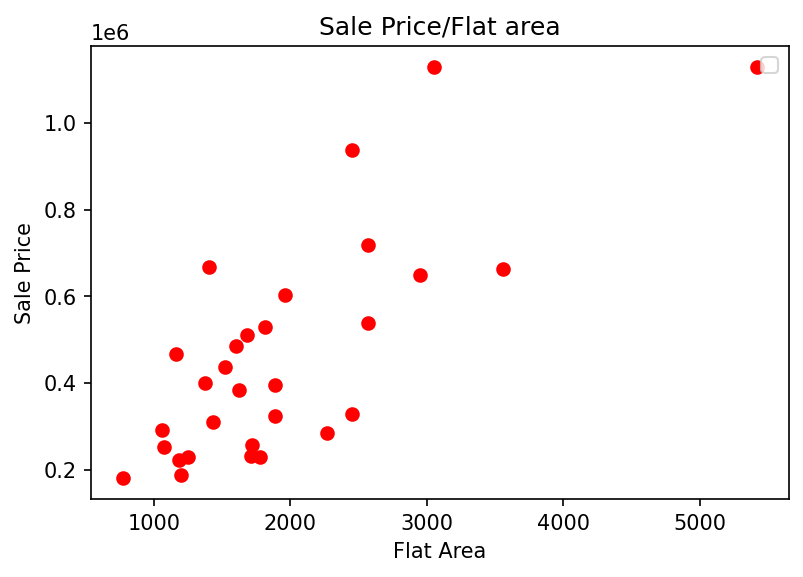

In [106]:
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='red')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price/Flat area')
plt.legend()
plt.show()

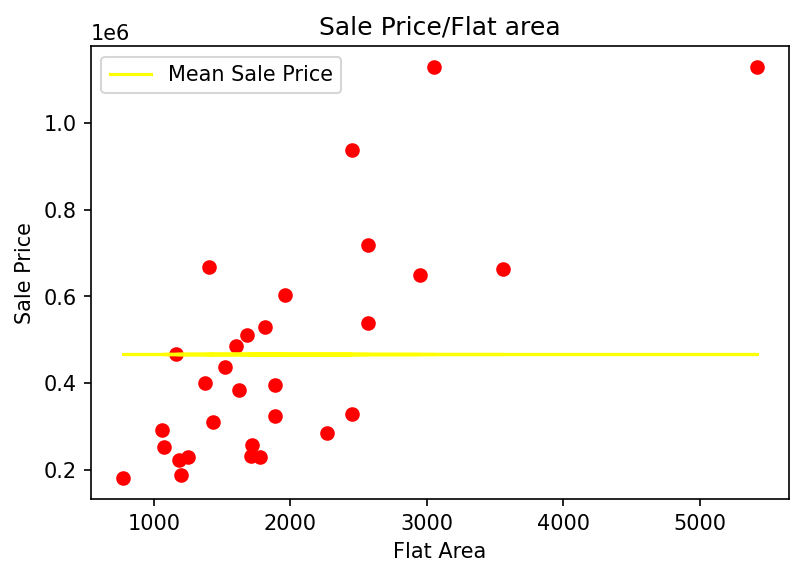

In [110]:
import matplotlib.pyplot as plt
sample_data['mean_sale_price']=sample_data.sale_price.mean()
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='red')
plt.plot(sample_data.flat_area,sample_data.mean_sale_price,color='yellow',label='Mean Sale Price')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price/Flat area')
plt.legend()
plt.show()


NameError: name 'mse' is not defined

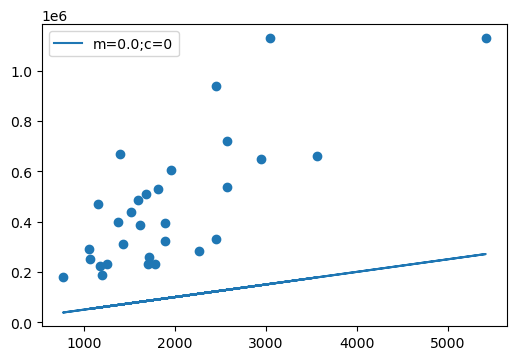

In [127]:
c=0
m=50
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)
plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.sale_price)
plt.plot(sample_data.flat_area,line,label='m=0.0;c=0')
plt.xlabel('')
plt.ylabel('')
plt.legend()
MSE=mse(sample_data.sale_price,line)
plt.title("slope"+str(m)+"with mse"+str(MSE))
                
                

In [129]:
def slope_error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp=sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
        MSE=mse(sample_data,sale_price,sale)
        return MSE

In [132]:
slope=[i/100 for i in range(0,5000)]
Cost=[]
for i in slope:
    Cost=slope_error(slope=i,intercept=0,sample_data=sample_data)
    Cost.append(Cost)

NameError: name 'mse' is not defined

In [133]:
##GRADIENT DESCENT ALGORITHM IN PYTHON
def param_init(Y):
    m=0.1
    c=Y.mean()
    return m,c


In [135]:
def generate_predictions(m,c,X)
prediction=[]
for x in X:
    pred=(m*X)+c
    prediction.append(pred)
    return prediction

SyntaxError: invalid syntax (<ipython-input-135-ba46894b36c1>, line 1)

In [137]:
def compute_cost(porediction,Y):
    cost=np.sum((prediction-Y)**2)/len(Y)
    return cost

In [138]:
def gradients(predictions,Y,X):
    n=len(y)
    Gm=2/n*np.sum((prediction-Y)*X)
    Gc=2/n*np.sum((prediction-Y)**X)
    return Gm,Gc

In [139]:
def parameter_update(m_old,c_old,Gm_old,Gc_old,alpha):
    m_new=m_old-alpha*Gm_old
    c_new=c_old_aplha*Gc_old
    return m_new,c_new

In [141]:
def result(m,c,X,Y,cost,prediction,i)
if(i<max_iter-1):
    print(" ".format(i)
else:
    print(" ",max_iter,'')

SyntaxError: invalid syntax (<ipython-input-141-c50f50b515ad>, line 1)

In [169]:
##scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sale_price=scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area=scaler.fit_transform(sample_data['flat_area'].values.reshpae(-1,1))
max_iter=1000
cost_old=0
alpha=0.01
m,c=param_init(sale_price3)
for i in range(0,max_iter):
    predictions=generate_predictions(m,c,flat_area)
    cost_new=compute_cost(predictions,sale_price)
    if abs(cost_new-cost_old)<10**(-7):
       break
Gm,GFc=gradients(predictions,sale_price,flat_area)
m,c=param_update(m,c,Gm,Gc,alpha)
if i%20==0:
 print('after iterations,i,';m=',;c=',c,';cost='cost_new')
result(m,c,flat_area,sale_price,cost_new,predictions,i)
       
       
       
       
       

SyntaxError: invalid syntax (<ipython-input-169-6cd166901c1c>, line 18)

In [ ]:
)